# seaborn - 한국복지패널데이터

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
plt.rc('font', family='AppleGothic')
plt.rcParams["font.size"] = 12.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [6]:
CHART_NAME = 'seabornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = '../data/welfare_python.csv'

In [22]:
# data load
welfare = pd.read_csv(filename, encoding = 'utf-8')
print(welfare.columns)
print(welfare)

Index(['gender', 'birth', 'marriage', 'religion', 'code_job', 'income',
       'code_religion'],
      dtype='object')
       gender  birth  marriage  religion  code_job  income  code_religion
0           2   1936         2         2       NaN     NaN              1
1           2   1945         2         2       NaN     NaN              1
2           1   1948         2         2     942.0   120.0              1
3           1   1942         3         1     762.0   200.0              1
4           2   1923         2         1       NaN     NaN              1
...       ...    ...       ...       ...       ...     ...            ...
16659       2   1967         1         1       NaN     NaN              5
16660       2   1992         5         1     314.0   302.5              5
16661       1   1995         5         1       NaN     NaN              5
16662       2   1998         0         1       NaN     NaN              5
16663       1   2001         0         1       NaN     NaN         

## data preprocessing
- gender 
    - 1 = 남성, 2 = 여성
- age : 열 추가
    - 이번 년도 - 생일년도 + 1
- marriage
    - 1 = 결혼, 3 = 이혼, 나머지 = 무응답
- income
    - 결측치는 income의 평균값으로
- religion
    - 1 = 있음, 2 = 없음
- code job
    - 'welfare_job.csv' 와 결합하여 직업이름정보 추출
- code religion
    - 7개의 권역별 지역으로 문자열로 구분
- ageg : 열 추가
    - 청년 = 30세 미만, 중년 = 30세 이상, 노년 = 60세 이상

In [23]:
# data preprocessing

# gender
welfare.loc[welfare['gender'] ==1, ['gender']] = '남성'
welfare.loc[welfare['gender'] ==2, ['gender']] = '여성'
print(""); print("<Gender 변경>")
print(welfare)


# age 추가
thisyear = 2021
welfare['age'] = thisyear - welfare['birth'] +1
print(""); print("<age 컬럼 추가>")
print(welfare)


# marriage
def setMarriage(x):
    if x ==1 :
        return '결혼'
    elif x ==3 :
        return '이혼'
    else: # 결측치
        return '무응답'

welfare['marriage'] = welfare['marriage'].apply(setMarriage)


# income
print('\n# 월급 결측치 개수 구하기 before')
print(sum(welfare['income'].isnull()))
welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()
print('\n# 월급 결측치 개수 구하기 after')
print(sum(welfare['income'].isnull()))


# religion
def setReligion_txt(x):
    if int(x) == 1:
        return '있음'
    else:
        return '없음'
print("welfare['religion'].unique() : ", welfare['religion'].unique())
welfare['religion'] = welfare['religion'].apply(setReligion_txt)
print(""); print("<religion 변경>")
print(welfare)


# code_job
job_file = '../data/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding = 'cp949')

print("welfare['code_job'].unique()", welfare['code_job'].unique())
print('\n# merge()함수와 left_on, rigon_on 사용하기')
welfare = pd.merge(welfare, jobframe, left_on = 'code_job', right_on = 'code_job')
print(welfare)


# code_religion
print("welfare['code_religion'].unique()", welfare['code_religion'].unique())
def setReligion_txt(x):
    if int(x) ==1:
        return '서울'
    elif int(x) == 2:
        return '수도권'
    elif int(x) == 3:
        return '부산/경남/울산'
    elif int(x) ==4:
        return '대구/경북'
    elif int(x) ==5:
        return '대전/충남'
    elif int(x) == 6:
        return '강원/충북'
    elif int(x) == 7:
        return '광주/전남/전북/제주도'
welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)


# ageg 추가 - 연령대
## 30대 미만 -> 청년, 30대 이상 -> 중년, 60세 이상 -> 노년
def newAge(x):
    if x<30:
        return '청년'
    elif x>=30 and x<60:
        return '중년'
    else:
        return '노년'
welfare['ageg'] = welfare['age'].apply(newAge)

print(welfare[['age', 'ageg']].head())


<Gender 변경>
      gender  birth  marriage  religion  code_job  income  code_religion
0         여성   1936         2         2       NaN     NaN              1
1         여성   1945         2         2       NaN     NaN              1
2         남성   1948         2         2     942.0   120.0              1
3         남성   1942         3         1     762.0   200.0              1
4         여성   1923         2         1       NaN     NaN              1
...      ...    ...       ...       ...       ...     ...            ...
16659     여성   1967         1         1       NaN     NaN              5
16660     여성   1992         5         1     314.0   302.5              5
16661     남성   1995         5         1       NaN     NaN              5
16662     여성   1998         0         1       NaN     NaN              5
16663     남성   2001         0         1       NaN     NaN              5

[16664 rows x 7 columns]

<age 컬럼 추가>
      gender  birth  marriage  religion  code_job  income  code_religion

In [24]:
# column들을 한글 이름으로 변경
col_mapping = {'gender' : '성별', 'birth':'생일', 'marriage':'결혼 유무', 
               'religion':'종교 유무', 'code_job' : '직업 코드', 'income' : '소득', 
               'code_religion': '지역구', 'age' : '나이', 'job' : '직업', 'ageg' : '연령대'}
welfare = welfare.rename(columns = col_mapping)

# csv 파일로 저장
welfare.to_csv('welfareClean.csv', index = False, encoding='cp949')

In [25]:
# 전처리를 완료한 데이터 print
print(welfare.columns)
print(welfare.head(10))
print(welfare.describe())
print(welfare['결혼 유무'].unique())
print(welfare['종교 유무'].unique())
print(welfare['지역구'].unique())
print(welfare['직업'].unique())
print(welfare['연령대'].unique())

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대'], dtype='object')
   성별    생일 결혼 유무 종교 유무  직업 코드          소득  지역구  나이         직업 연령대
0  남성  1948   무응답    없음  942.0  120.000000   서울  74  경비원 및 검표원  노년
1  남성  1945    이혼    없음  942.0  220.200000   서울  77  경비원 및 검표원  노년
2  남성  1946    결혼    없음  942.0  139.000000   서울  76  경비원 및 검표원  노년
3  남성  1953    결혼    없음  942.0  150.000000   서울  69  경비원 및 검표원  노년
4  남성  1960    결혼    있음  942.0  166.000000   서울  62  경비원 및 검표원  노년
5  남성  1939    결혼    있음  942.0  241.619016   서울  83  경비원 및 검표원  노년
6  남성  1947    결혼    있음  942.0  150.000000  수도권  75  경비원 및 검표원  노년
7  남성  1952    이혼    없음  942.0  170.000000   서울  70  경비원 및 검표원  노년
8  남성  1949    결혼    있음  942.0  100.000000   서울  73  경비원 및 검표원  노년
9  남성  1942    결혼    있음  942.0  120.000000   서울  80  경비원 및 검표원  노년
                생일        직업 코드           소득           나이
count  7529.000000  7529.000000  7529.000000  7529.000000
mean   1964.012087   591.243724   241.619016    57.9

In [26]:
# 파일 저장

def FileSave():
    global cnt
    cnt +=1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

## 막대그래프
- sns.countplot()

### 결혼 유무에 대한 빈도 수 막대그래프로 그리기
- 결혼 유무 : 범주형 데이터
- seaborn library 사용
    - countplot() : 범주형 데이터에 대하여 항목별 개수를 세어서 막대그래프를 그림
        - x: dataframe의 열 이름 문자열을 지정
        - data : 대상이 되는 dataframe
        - hue : 특성을 구분할 컬럼 지정
        - order : 열거할 데이터의 순서
        - linewidth : 테두리 선의 두께 지정
        - edgecolor : Bar의 테두리 색상을 지정할 때 사용
        - palette : 색상 팔레트를 지정

결혼 유무 빈도
결혼 유무
결혼     5307
무응답    1803
이혼      419
Name: 결혼 유무, dtype: int64


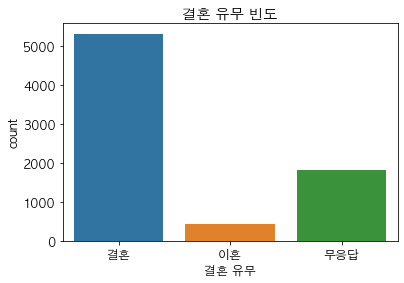

seabornWelfare_01.png파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [30]:
print("결혼 유무 빈도")

# 결혼 유무의 범주별로 각각 몇 건이 존재하는지 확인, 그룹별 개수 groupby 매소드 사용
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
print(result)

ORDERING = ['결혼', '이혼', '무응답']
plt.figure()
plt.title('결혼 유무 빈도')

sns.countplot(x='결혼 유무', data=welfare, order=ORDERING)
plt.show()
FileSave()

### 결혼 유무를 기준으로 종교 유무에 대한 빈도 수 막대그래프로 그리기
- 결혼 유무/종교 유무 : 범주형 데이터
- seaborn library 사용
    - countplot() : 범주형 데이터에 대하여 항목별 개수를 세어서 막대그래프를 그림

결혼 유무 vs 종교 유무 빈도
결혼 유무  종교 유무
결혼     없음       2778
       있음       2529
무응답    없음        932
       있음        871
이혼     없음        247
       있음        172
Name: 결혼 유무, dtype: int64


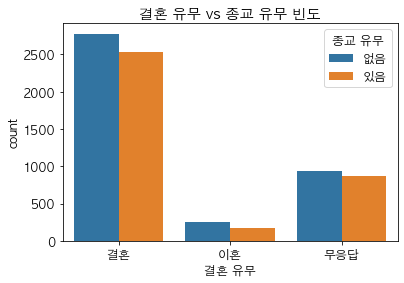

seabornWelfare_02.png파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [31]:
print("결혼 유무 vs 종교 유무 빈도")

# 결혼 유무의 범주별로 각각 몇 건이 존재하는지 확인, 그룹별 개수 groupby 매소드 사용
result = welfare.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()
print(result)

ORDERING = ['결혼', '이혼', '무응답']
plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')

# hue: 특성을 구분할 컬럼 - 하위 구조
sns.countplot(x='결혼 유무', hue = '종교 유무', data=welfare, order=ORDERING)
plt.show()
FileSave()

### 막대의 테두리 선의 굵기 지정
- linewidh : 막대 선의 굵기
- edgecolor : 막대 선의 색상 지정

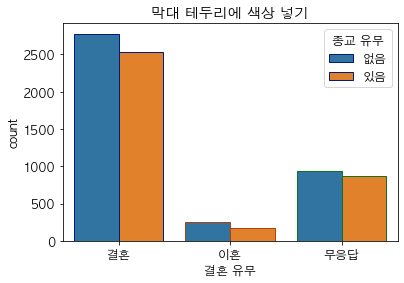

seabornWelfare_03.png파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure()
plt.title('막대 테두리에 색상 넣기')
sns.countplot(x = '결혼 유무', hue = '종교 유무', data = welfare, order=ORDERING,
             linewidth = 1, edgecolor = sns.color_palette("dark", 3))
# sns.color_palette : seaborn의 palette의 어두운 색깔 중 3개 선택
plt.show()
FileSave()

### 가로 막대 그래프 그리기
- 매개변수 x 대신에 y를 사용하면 수직 막대 형식이 아닌 수평 막대 형식의 그래프가 출력됨

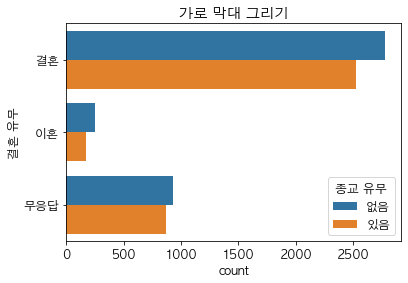

seabornWelfare_04.png파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure()
plt.title('가로 막대 그리기')
sns.countplot(y = '결혼 유무', hue='종교 유무', data = welfare, order =ORDERING)
plt.show()
FileSave()

### 색상 팔레트를 지정
- palette 매개변수를 이용하여 지정된 팔레트를 사용하여 색상을 지정

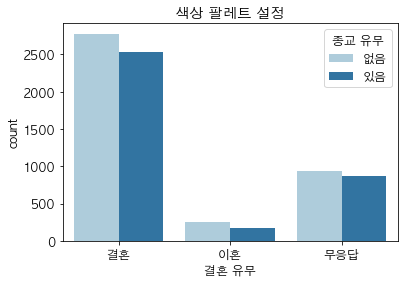

seabornWelfare_05.png파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure()
plt.title('색상 팔레트 설정')
sns.countplot(x = '결혼 유무', hue = '종교 유무', palette = 'Paired', data= welfare, order = ORDERING)
# palette : 'Paired' 색상이름
plt.show()
FileSave()

## 히스토그램
- sns.distplot()
    - 매개 변수
        - x : Series, 1d-array, list 사용
        - bins : 계급의 개수를 지정하는 매개변수
        - hist : True이면 히스토그램을 그림
        - kde : histogram보다 부드러운 형태의 분포 곡선을 보여주는 방법. True이면 Kernel density형식으로 보여줌
        - vertical : True면 가로로 그래프를 그림 (default : vertical = False)
        - color : 색상을 지정
        - rug : True이면 rug(선분) 보여줌
- **1차원** 데이터
- 러그와 커널밀도표시 기능이 있어서 많이 사용
- 일변량 데이터에 사용 

### 나이에 따른 히스토그램

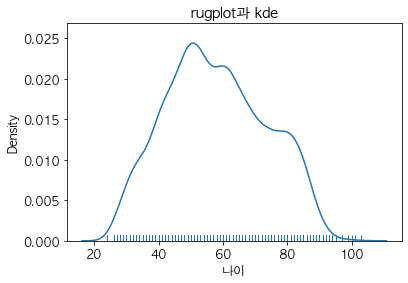

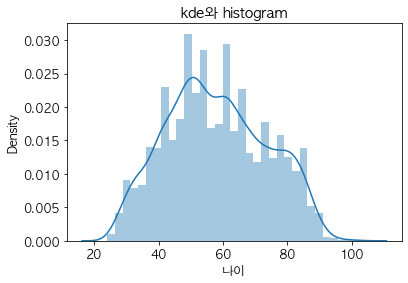

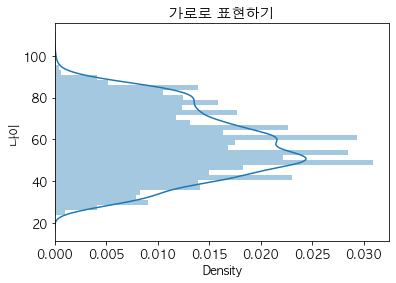

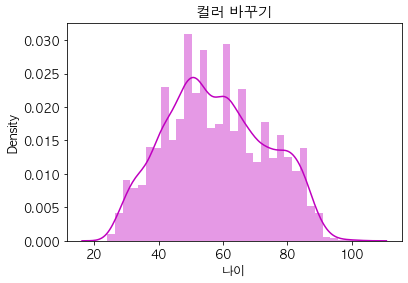

In [46]:
x = welfare['나이']

## 1) 선분만 그리기
plt.figure()
plt.title('rugplot과 kde')
sns.distplot(x, rug=True, hist = False, kde = True)
plt.show()


## 2) 커널밀도곡선과 히스토그램을 동시에 보여주기
plt.figure()
plt.title('kde와 histogram')
sns.distplot(x, rug=False, hist = True, kde = True)
plt.show()


## 3) 데이터를 가로 방향으로 그리기
plt.figure()
plt.title('가로로 표현하기')
sns.distplot(x, vertical = True)
plt.show()


## 색상을 지정하기
plt.figure()
plt.title('컬러 바꾸기')
sns.distplot(x, color = 'm')
plt.show()

## 히트맵(heatmap)
- sns.heatmap()
    - 매개변수
        - data : 2차원 형식의 데이터
        - cmap : colormap 이름이나 색상을 담고 있는 List 자료구조
        - annot : True이면 cell에 해당하는 수치 값을 보여준다.
- 데이터가 **2차원**이고 모든 값이 카테고리 값이면 heatmap 명령 사용
    - 카테고리 값 :: 숫자
    - 데이터가 2차원이어야 하기 때문에 Pivot_table 사용
    - pivot table
        - .pivot_table(index = '', columns = '', values = '')
        - index : Y축, columns : x축, values : 값
- heatmap은 색상으로 표현된 행렬 정보를 이용하여 사각형의 그래프를 그림
- heatmap을 이용해도 두 개의 카테고리 값에 의한 실수 값의 변화를 볼 수 있음

### 결혼 유무와 성별에 따른 히트맵
- 값이 적을 수록 진한 색상으로 출력
- 결혼 유무 : x축, 성별 : y축

pivot_table을 이용한 시각화
결혼 유무         결혼        무응답        이혼
성별                                   
남성     60.806978  44.629973  59.57767
여성     59.890179  54.913251  58.28169


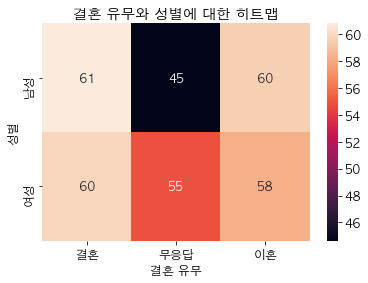

In [48]:
pivot = welfare.pivot_table(index = '성별', columns = '결혼 유무', values = '나이')
print('pivot_table을 이용한 시각화')
print(pivot)

## 1) pivot table을 이용한 시각화
# index : Y축, columns : X축
plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data=pivot, annot=True)
plt.show()

### 상관계수를 이용한 히트맵
- dataframe에 corr()함수를 이용하면 상관계수 구할 수 있음
- correlation 을 시각화
    - 상관계수 (1과 -1 사이의 값을 가짐) : 숫자 데이터

상관 관계 시각화
             생일     직업 코드        소득        나이
생일     1.000000 -0.287829  0.093783 -1.000000
직업 코드 -0.287829  1.000000 -0.287414  0.287829
소득     0.093783 -0.287414  1.000000 -0.093783
나이    -1.000000  0.287829 -0.093783  1.000000



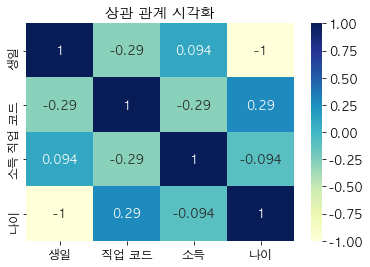

In [49]:
# 상관계수 구하기
cor = welfare.corr()
print('상관 관계 시각화')
print(cor); print("")

plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data = cor, annot=True, cmap ='YlGnBu')
plt.show()

## 짝 그래프(pairplot)
- sns.pairplot()
    - 매개변수
        - data : 적용할 dataframe
        - hue : 특성을 구분할 컬럼 지정
        - palette : 팔레트 지정
        - height : 각 facet의 높이를 inches로 지정 (default = 2.5)
        - markers : 마킹될 도형의 모양 지정
            - ex) markers = ['o', 's', 'D', 'p']
- **3차원** 이상의 다차원 **실수형** 데이터
- pairplot 함수는 dataset 중에서 각각 2개 컬럼들간의 관계를 그래프로 그려줌

### 직업 코드, 소득, 나이, 결혼 유무에 대한 pairplot

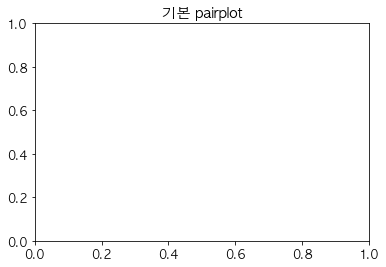

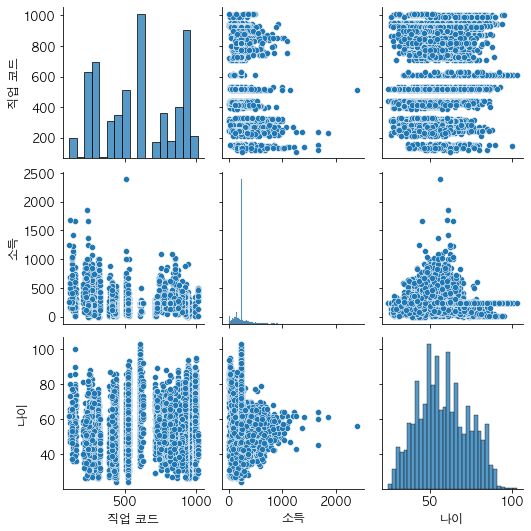

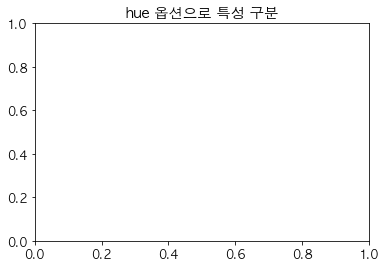

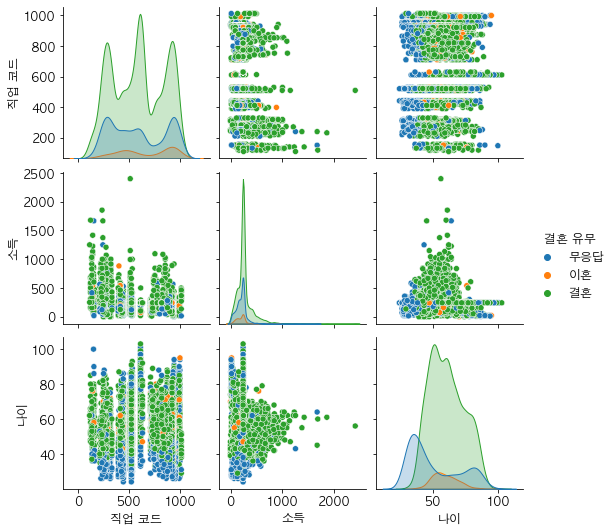

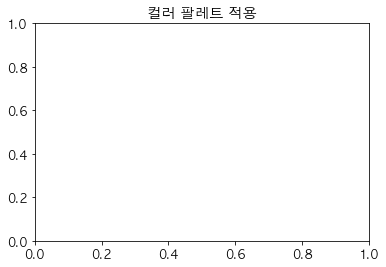

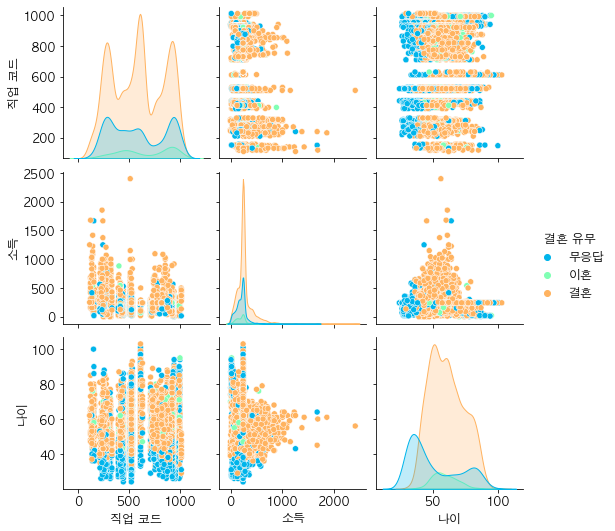

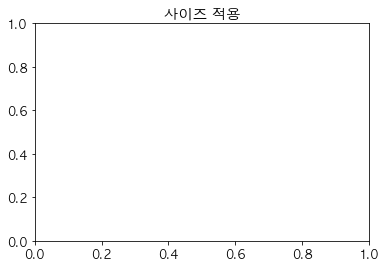

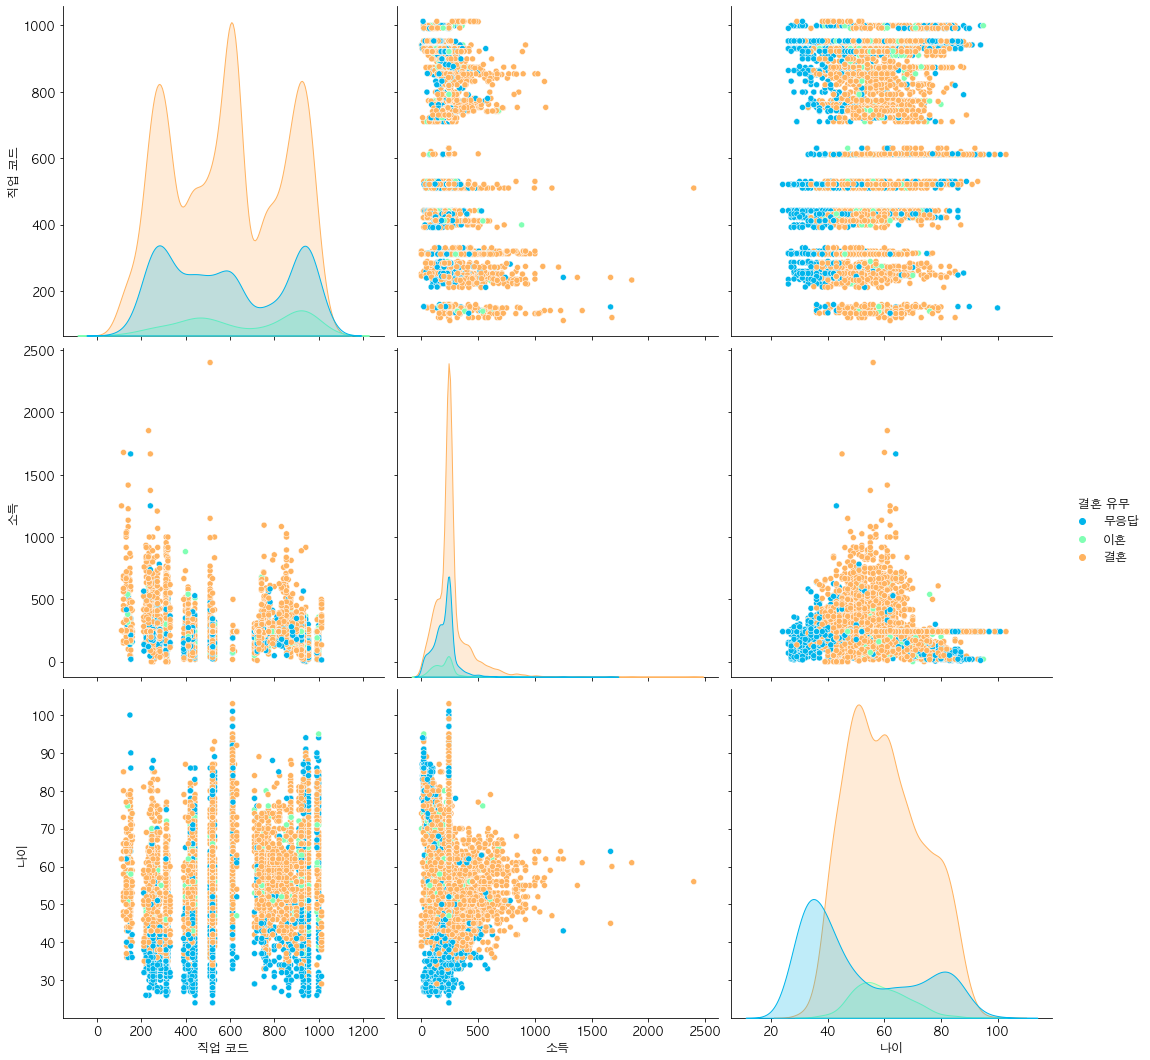

In [55]:
newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

## 1) 기본 Pairplot
plt.figure()
plt.title('기본 pairplot')
sns.pairplot(data = newwelfare)
plt.show()
# 우측 하단의 '나이'에 대한 히스토그램을 확인해보면 대략 50대에서 60대가 많이 분포되어 있음을 확인
# 중앙의 '소득'에 대한 히스토그램을 보면 유독 큰 소득이 있는데, 이상치일 확률이 높음


## 2) 결혼 유무에 따른 그래프를 추가하기 - 결혼 유무는 실수형 데이터가 아니므로 색상으로 구분
plt.figure()
plt.title('hue 옵션으로 특성 구분')
sns.pairplot(data=newwelfare, hue= '결혼 유무')
plt.show()


## 3) 다른 색상을 지정
plt.figure()
plt.title('컬러 팔레트 적용')
sns.pairplot(data=newwelfare, hue = '결혼 유무', palette = 'rainbow')
plt.show()


## 4) height 높이 지정
plt.figure()
plt.title('사이즈 적용')
sns.pairplot(data=newwelfare, hue = '결혼 유무', palette = 'rainbow', height = 5)
plt.show()

## 바이올린 그래프(violinplot)
- sns.violinplot()
    - 매개변수
        - x : 그리고자 하는 컬럼을 명시
        - data : 대상이 되는 데이터프레임 지정
        - hue : 특성을 구분할 컬럼을 지정
        - palette: 색상 팔레트를 지정
- **KDE 플롯과 Box 플롯을 서로 조합**하여 그린 그래프
- 상자수염 그래프(=Box 플롯)과는 달리 커널 밀도 추정치를 이용하여 그래프를 그림
- 분포에 대한 결과를 보여주는 데는 효과적이나, 적은 샘플 사이즈를 이용하여 보여주는 경우 오해의 소지가 있을 수 있음
    - sample수가 적어지면 통계치에 오류가 많이 발생하기 때문에

### 나이에 대한 바이올린 그래프
- 바이올린 그래프는 column에 대한 데이터의 비교 분포도를 확인할 수 있는데, 외부의 곡선을 데이터의 분포를 나타냄
- max, min :: IQR * 1.5 보다 넘어가는 값

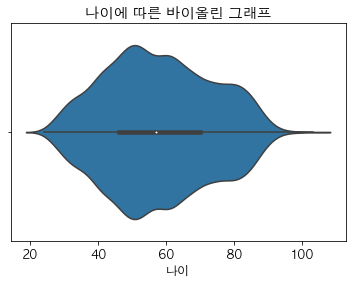

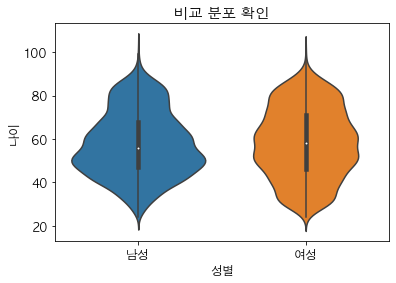

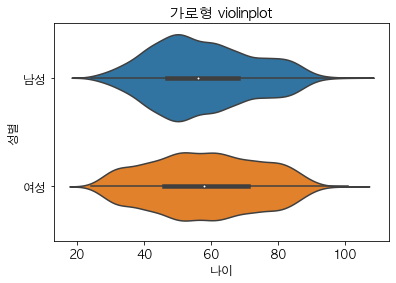

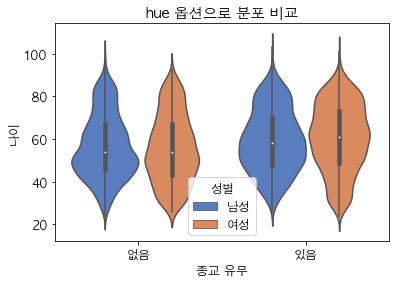

In [57]:
## 1) 기본
plt.figure()
plt.title('나이에 따른 바이올린 그래프')
sns.violinplot(x = '나이', data = welfare)
plt.show()
# 약 50정도의 나이에 많은 데이터가 분포되어 있음을 알 수 있음


## 2) x,y축 지정하기 - x, y축을 지정해 줌으로써 바이올린을 분할하여 비교 분포를 볼 수 있음
plt.figure()
plt.title('비교 분포 확인')
sns.violinplot(x = '성별', y = '나이', data = welfare)
plt.show()


## 3) 가로형태의 바이올린 그래프
plt.figure()
plt.title('가로형 violinplot')
sns.violinplot(y = '성별', x = '나이', data = welfare)
plt.show()


# 4) hue 옵션으로 분포 비교
plt.figure()
plt.title('hue 옵션으로 분포 비교')
sns.violinplot(x = '종교 유무', y= '나이', hue = '성별', data = welfare, palette = "muted")
plt.show()

## 선형 회귀 모델 그래프(Lmplot) - linear regression model
- sns.lmplot()
    - 매개변수
        - x, y : x축과 y축에 그려질 데이터를 명시
        - data : 사용할 dataframe 지정
        - hue : 구분할 컬럼 지정
        - height : 각 항목의 면(facet)에 대한 높이를 Inch단위로 지정 (default : 2.5)
        - col = '성별' : 항목별 그래프를 별도로 그려볼 수 있음
        - col_wrap=숫자 : 한 줄에 표기할 column의 개수를 명시
        - scatter_kws : scatter관련 keyword를 사전 형식으로 지정
            - ex) scatter_kws = dict(s=60, linewidths=.7, edgecolors ='black')
- 선형 회귀 모델과 연관이 있는 함수로써 column 간의 선형적인 관계를 확인
- 이상치 데이터도 짐작 가능

### 나이와 소득에 대한 산점도 그래프를 확인


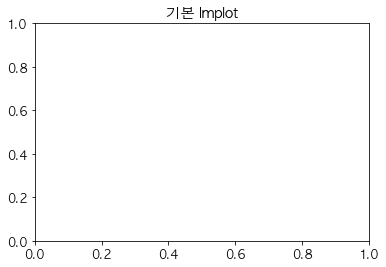

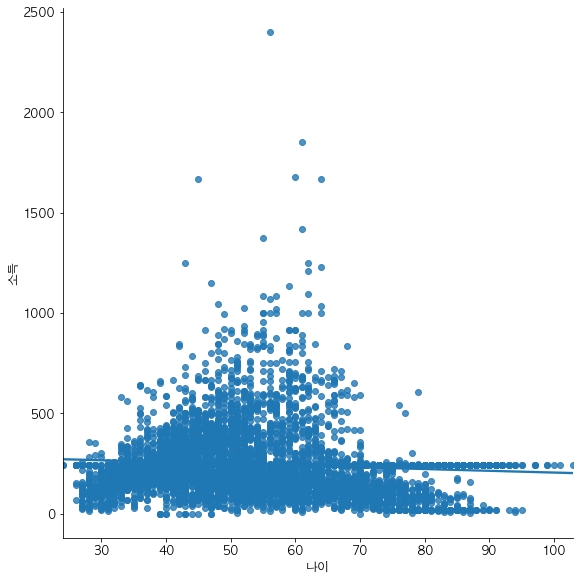

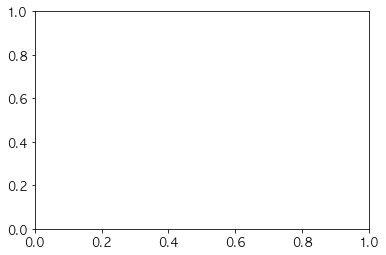

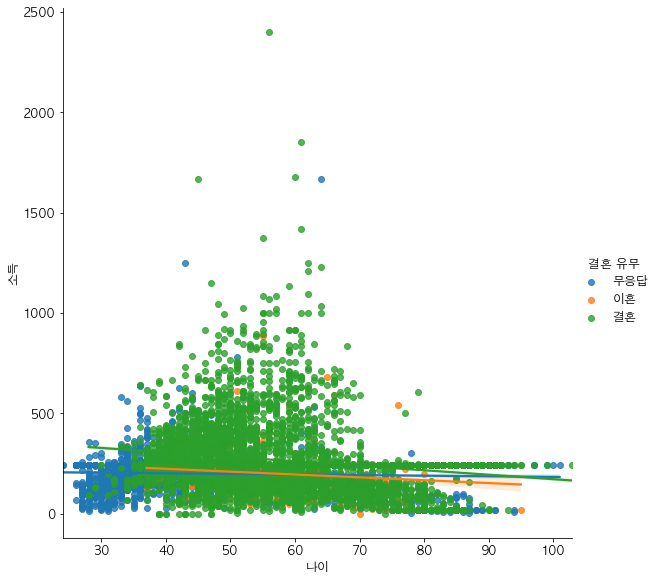

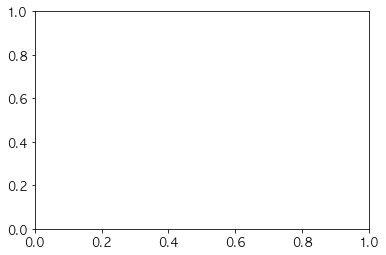

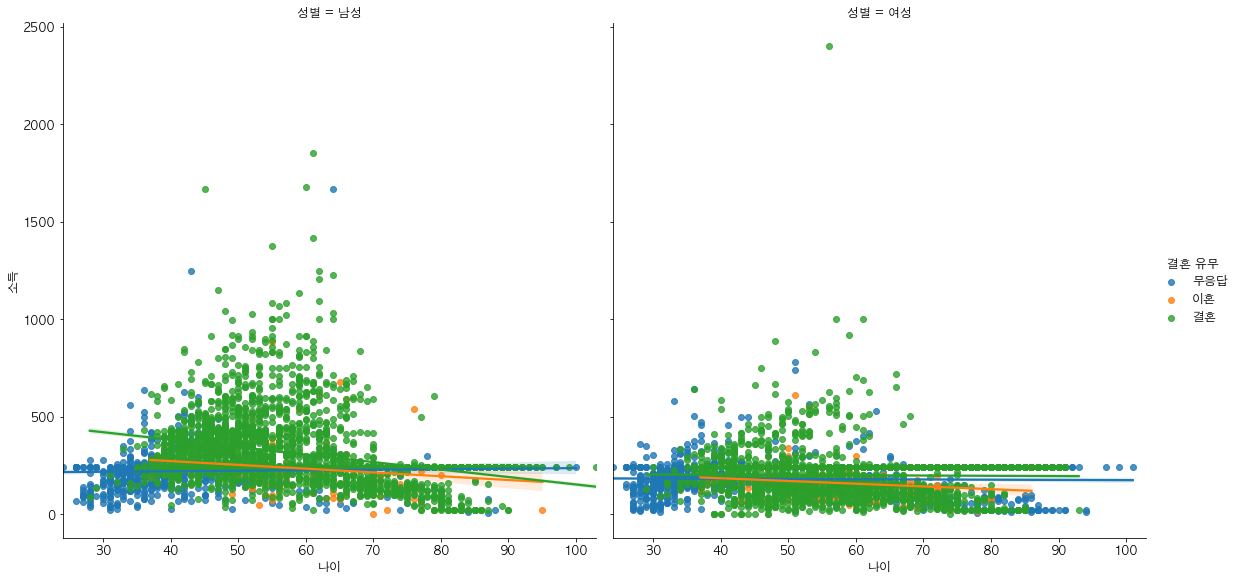

In [62]:
## 1) 기본 lmplot
plt.figure()
plt.title('기본 lmplot')
sns.lmplot(x = '나이', y='소득', height = 8, data =welfare)
plt.show()
# y축의 값이 300인 부근에 존재하는 직선은 회귀선을 의미


## 2) 범주형 데이터의 항목별로 선형관계 그리기
plt.figure()
plt.title('')
sns.lmplot(x = '나이', y='소득', hue = '결혼 유무', height = 8, data = welfare)
plt.show()
# 이혼에 대한 데이터가 상대적으로 적음


## 3) col 매개변수를 사용하여 항목별 그래프를 별도로 그려보기
# col_wrap으로 한 줄에 표기할 column 개수 명시
plt.figure()
plt.title('')
sns.lmplot(x = '나이', y='소득', hue = '결혼 유무', col = '성별', col_wrap = 2, height = 8, data = welfare)
plt.show()


## 산점도
- sns.relplot()
- 두 column 간 상관 관계를 보여주지만, Lmplot처럼 선형 관계를 따로 그려주지는 않음

### 나이와 소득에 따른 산점도
- 위 그래프와 동일하되, '결혼 유무'라는 범주형 데이터 개수 만큼 데이터를 별도로 그린다!

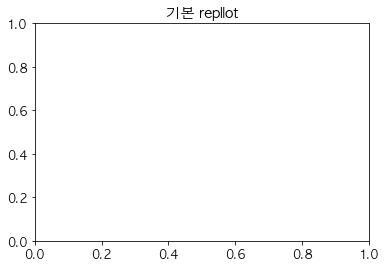

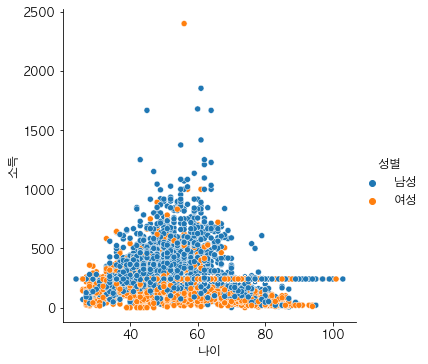

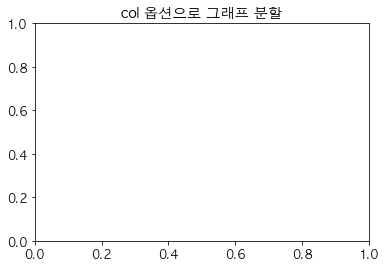

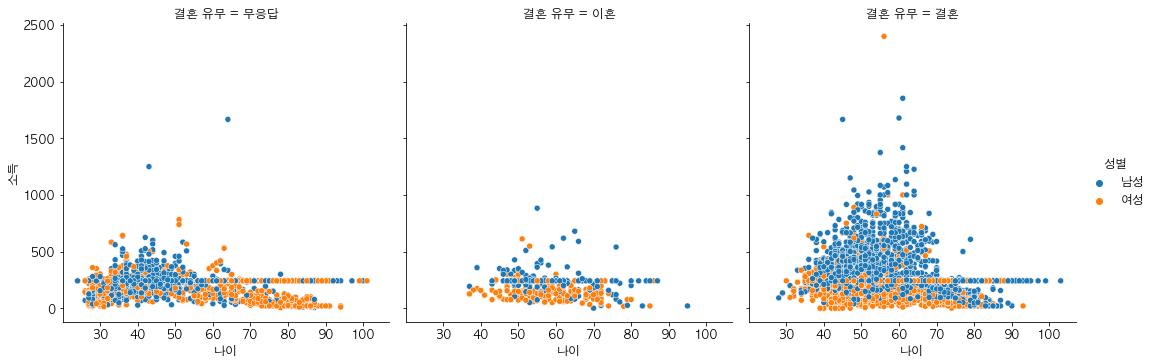

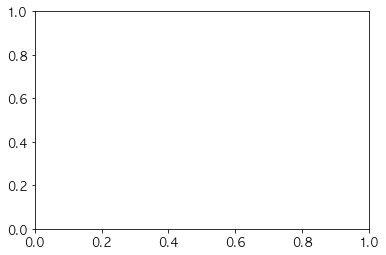

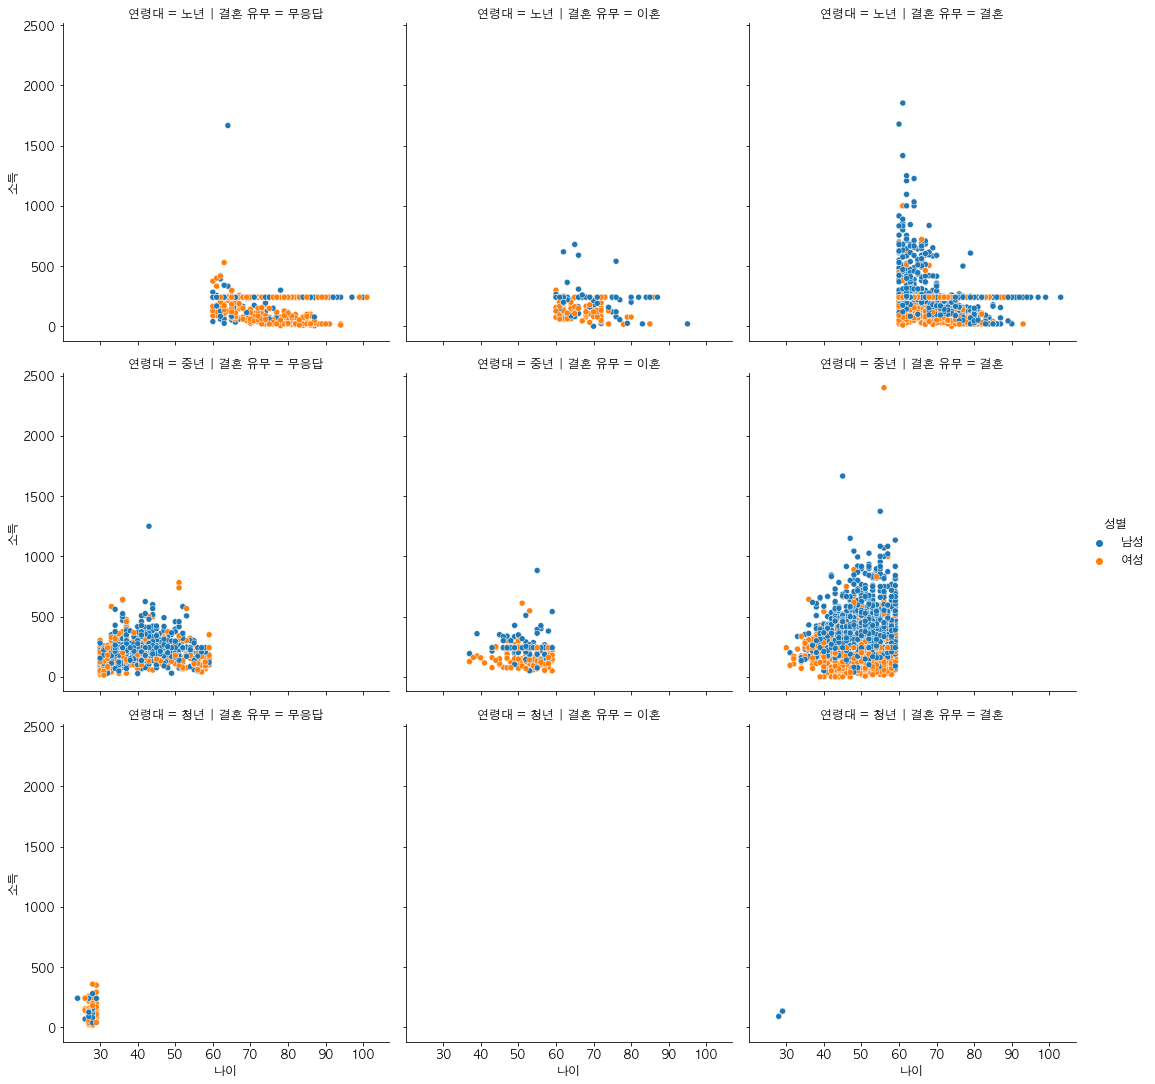

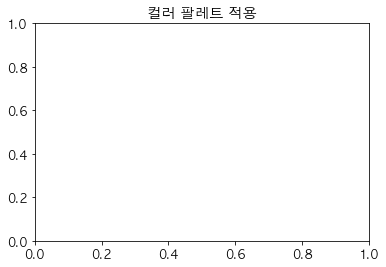

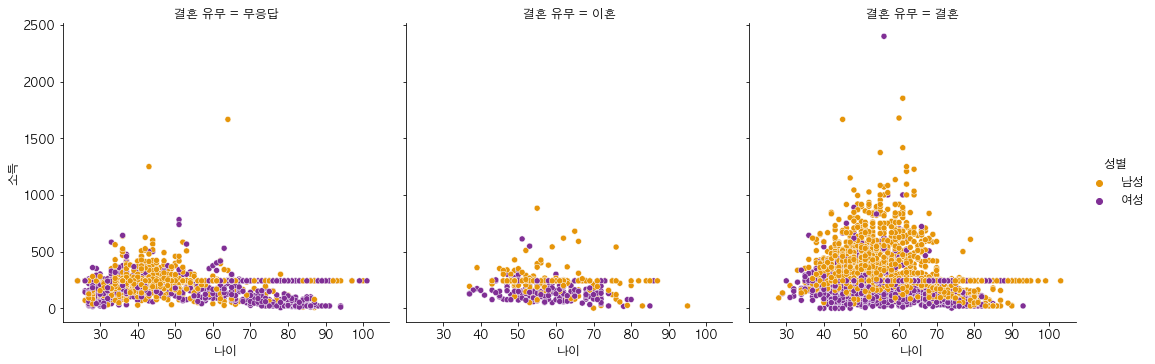

In [67]:
## 1) 기본 replot
plt.figure()
plt.title('기본 repllot')
sns.relplot(x='나이', y= '소득', hue='성별', data=welfare)
plt.show()


## 2) 결혼 유무 범주형 데이터 개수 만큼 데이터를 늘리기 - col 옵션
plt.figure()
plt.title('col 옵션으로 그래프 분할')
sns.relplot(x='나이', y='소득', hue='성별', col='결혼 유무', data =welfare)
plt.show()


## 3) row 옵션도 사용
# row -> y축  
# col -> x축
plt.figure()
plt.title('')
sns.relplot(x='나이', y='소득', hue='성별', col='결혼 유무', row='연령대', data =welfare)
plt.show()


## 4) 색상 지정
plt.figure()
plt.title('컬러 팔레트 적용')
sns.relplot(x='나이', y='소득', hue='성별', col='결혼 유무', palette='CMRmap_r', data =welfare)
plt.show()
# 색 팔레트 지정 :: palette